$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}$

# Assignment 5: Neural Networks

Lucas Wilson

# Overview

You will write and apply code that trains neural networks of various numbers of hidden layers and units in each hidden layer and returns results as specified below.  You will do this once for a regression problem and once for a classification problem. 

# Required Code

In [1]:
import neuralnetworks as nn
import mlutils as ml

from copy import deepcopy, copy
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def trainNNs(X, T, trainFraction, hiddenLayerStructures, numberRepetitions, numberIterations, classify):
    """
    Args:
        * `X` is a matrix of input data of shape `nSamples x nFeatures`
        * `T` is a matrix of target data of shape `nSamples x nOutputs`
        * `trainFraction` is fraction of samples to use as training data. 1-`trainFraction` is number of samples for testing data
        * `hiddenLayerStructures` is list of network architectures. For example, to test two networks, one with one hidden layer of 20 units, and one with 3 hidden layers with 5, 10, and 20 units in each layer, this argument would be `[[20], [5, 10, 20]]`.
        * `numberRepetitions` is number of times to train a neural network. Calculate training and testing average performance (two separate averages) of this many training runs.
        * `numberIterations` is the number of iterations to run the scaled conjugate gradient algorithm when a neural network is trained.
        * `classify` is set to `True` if you are doing a classification problem, in which case `T` must be a single column of target class integers.

    Returns:
        `results` which is list with one element for each network structure tested. Each element is a list containing:
            * the hidden layer structure (as a list),
            * a list of training data performance for each repetition, 
            * a list of testing data performance for each repetition, and
            * the number of seconds it took to run this many repetitions for this network structure.

    Process:
      * For each network structure given in `hiddenLayerStructures`
        * For numberRepetitions
          * Use `ml.partition` to randomly partition X and T into training and testing sets.
          * Create a neural network of the given structure
          * Train it for numberIterations
          * Use the trained network to produce outputs for the training and for the testing sets
          * If classifying, calculate the fraction of samples incorrectly classified for training and testing sets.
           Otherwise, calculate the RMSE of training and testing sets.
          * Add the training and testing performance to a collection (such as a list) for this network structure
        * Add to a collection of all results the hidden layer structure, lists of training performance and testing performance, and seconds taken to do these repetitions.
      * return the collection of all results
    """
    # split test/train
    trainX,trainT,testX,testT = ml.partition(X,T,(trainFraction,1-trainFraction),classification=classify)
    results = []
    for hiddenLayerStructure in hiddenLayerStructures:
        resultsAppendage = [hiddenLayerStructure, [], [], 0]
        startTime = time.time()
        for _ in range(numberRepetitions):
            nnet = nn.NeuralNetwork(X.shape[1], hiddenLayerStructure, T.shape[1])
            nnet.train(trainX, trainT, numberIterations)
            trainY = nnet.use(trainX)
            testY = nnet.use(testX)
            if classify:
                trainPerformance = frac(trainT, trainY)
                testPerformance = frac(testT, testY)
            else:
                trainPerformance = msqe(trainT, trainY)
                testPerformance = msqe(trainT, trainY)
            resultsAppendage[1].append(trainPerformance)
            resultsAppendage[2].append(testPerformance)
        resultsAppendage[3] = time.time() - startTime # now in seconds
        results.append(resultsAppendage)
    return results

def msqe(T, Y)
    return np.sqrt(np.mean((T-Y)**2))

def frac(T, Y):
    # calculate the fraction of samples incorrectly classified for training and testing sets
    right = 0
    wrong = 0
    for t, y in zip(T, Y):
        if t==y:
            right+=1
        else:
            wrong+=1
    return wrong / (right + wrong)

I define MSQE as follows:
Let $E = T - Y$ where $T$ is actual values, $Y$ is predicted by the model, and $E,T,Y \epsilon \mathbb{R}^{n\times m}$

$MSQE = \sqrt{\frac{||E||_2^2}{nm}}$ where $||•||_2$ is $L_2$ matrix norm

In [3]:
def summarize(results):
    """
    Args:
        The output of trainNNs()

    Returns:
        a list of lists like `results` but with the list of training performances
        replaced by their mean and the list of testing performances replaced by
        their mean.
    """
    results = deepcopy(results)
    for i,result in enumerate(results):
        results[i] = result[0], np.mean(result[1]), np.mean(result[2]), result[3]
    return results

In [4]:
def bestNetwork(summary):
    """
    Args:
        The output of summarize
        
    Returns:
        Returns the best element of `results`, determined by the element that has
        the smallest test performance.
    """
    best = 0
    bestValue = np.inf
    for i, result in enumerate(summary):
        value = result[2]
        if value < bestValue:
            best = i
            bestValue = value
    return summary[best]

# Examples

In [76]:
X = np.arange(10).reshape((-1,1))
T = X + 1 + np.random.uniform(-1, 1, ((10,1)))

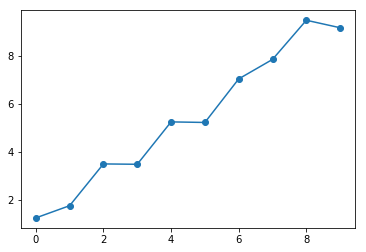

In [77]:
plt.plot(X, T, 'o-');

In [78]:
nnet = nn.NeuralNetwork(X.shape[1], 2, T.shape[1])
nnet.train(X, T, 100)
nnet.getErrorTrace()

array([0.71, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.43, 0.28,
       0.25, 0.15, 0.15, 0.15, 0.15, 0.13, 0.12, 0.11, 0.11, 0.11, 0.11,
       0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11,
       0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11,
       0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11,
       0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11,
       0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11,
       0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11,
       0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11,
       0.11, 0.11])

In [8]:
nnet = nn.NeuralNetwork(X.shape[1], [5, 5, 5], T.shape[1])
nnet.train(X, T, 100)
nnet.getErrorTrace()

array([0.70710678, 0.57309565, 0.57309565, 0.43163012, 0.24126546,
       0.16374685, 0.12705871, 0.11678995, 0.07489894, 0.07442467,
       0.07356634, 0.06805358, 0.06524633, 0.0635545 , 0.06066493,
       0.05829651, 0.05817336, 0.05743338, 0.05733101, 0.05727533,
       0.05724916, 0.05705867, 0.05701115, 0.05693773, 0.05690194,
       0.05677163, 0.05649741, 0.05634835, 0.05628423, 0.05627231,
       0.05626732, 0.05626253, 0.05624996, 0.05624851, 0.05623664,
       0.05611664, 0.05608617, 0.05608337, 0.05607419, 0.05607215,
       0.05607028, 0.05606607, 0.05605816, 0.05605428, 0.05605208,
       0.05604483, 0.05604383, 0.05604105, 0.05603976, 0.05603731,
       0.05603612, 0.05603408, 0.05603313, 0.05603174, 0.05603118,
       0.0560302 , 0.05602982, 0.05602899, 0.05602867, 0.05602784,
       0.05602749, 0.0560266 , 0.05602624, 0.05602542, 0.05602506,
       0.05602442, 0.05602404, 0.05602359, 0.05602305, 0.05602266,
       0.05602181, 0.05602134, 0.05602007, 0.05601951, 0.05601

In [9]:
Y = nnet.use(X)
np.sqrt((Y-T)**2)
Y-T

array([[-0.0466464 ],
       [ 0.18826939],
       [-0.2759482 ],
       [ 0.0881317 ],
       [ 0.11762717],
       [-0.15674088],
       [ 0.27939634],
       [-0.42492736],
       [ 0.32692532],
       [-0.09335799]])

In [10]:
results = trainNNs(X, T, 0.8, [2, 10, [10, 10]], 5, 100, classify=False)
results

[[2,
  [0.2194713258263557,
   0.2114095714985508,
   0.22274715335941345,
   0.2227996106190234,
   0.22538059607592936],
  [0.35578212958562017,
   0.5471097371212502,
   0.3293095892741292,
   0.33108550016827787,
   0.3264035525050801],
  0.14601969718933105],
 [10,
  [0.09737985028760267,
   0.20359267098049927,
   0.18984175932892755,
   0.19473738471764884,
   0.15328914078006337],
  [1.081646185211485,
   0.42372654880573324,
   0.44779456211306584,
   0.419172796385056,
   0.667377209656179],
  0.10531091690063477],
 [[10, 10],
  [0.18563886693410858,
   0.2132182479268321,
   0.1272122271397655,
   0.18245430026252607,
   0.0823915155723054],
  [0.5034337072293381,
   0.4078126692979338,
   0.79027132259832,
   0.6856635825746842,
   1.1897997384771848],
  0.1346449851989746]]

In [11]:
results = trainNNs(X, T, 0.8, [0, 1, 2, 10, [10, 10], [5, 5, 5, 5], [2]*5], 50, 100, classify=False)

In [12]:
summarize(results)

[(0, 0.38801431490062305, 0.7751956676656273, 0.026372194290161133),
 (1, 0.23819926337062783, 0.3101722025301149, 0.9555912017822266),
 (2, 0.19052123800422358, 0.5380342485530495, 0.9629521369934082),
 (10, 0.172407092396284, 0.6375270325821818, 0.9033830165863037),
 ([10, 10], 0.17114145671898817, 0.6650026043422542, 1.1804962158203125),
 ([5, 5, 5, 5], 0.19063665127215235, 0.5173539783231983, 1.7652430534362793),
 ([2, 2, 2, 2, 2], 0.21725590782674886, 0.390199927287506, 1.8850581645965576)]

In [13]:
best = bestNetwork(summarize(results))
print(best)
print('Hidden Layers {} Average RMSE Training {:.2f} Testing {:.2f} Took {:.2f} seconds'.format(*best))

(1, 0.23819926337062783, 0.3101722025301149, 0.9555912017822266)
Hidden Layers 1 Average RMSE Training 0.24 Testing 0.31 Took 0.96 seconds


Hummm...neural nets with no hidden layers did best on this simple data set.  Why?  Remember what "best" means.

## Analysis

The reason a neural network without hidden layers performs better than more complex ones is because..

1. A neural network without hidden layers is just linear and the actual function is linear, so naturally, the best model for a function is itself. That's why a no hidden layer neural network performs well.
2. Since there are no hidden layers, it can't over-fit to the training data since it's not complex enough. However, the more complex models which do over-fit fit to the noise added, so they fail to perform well on testing data since the learned noise is useless.

## Data for Regression Experiment

In [79]:
!wget -nc -q http://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv

In [80]:
def removeQuotes(word):
    return word[1:-1]
cols = tuple(range(1, 27))
colConverter = {}
for col in cols:
    colConverter[col] = removeQuotes
names = list(np.loadtxt('energydata_complete.csv', dtype=str, delimiter=",", usecols=cols, converters=colConverter)[0])
data = np.loadtxt('energydata_complete.csv', delimiter=",", skiprows=1, usecols=cols, converters=colConverter)

In [81]:
names[1:5] # just some cuz space

['lights', 'T1', 'RH_1', 'T2']

In [82]:
data.shape

(19735, 26)

In [83]:
Xenergy, Xnames = data[:,2:], names[2:]
Tenergy, Tnames = data[:,:2], names[:2]

Xenergy.shape, Tenergy.shape

((19735, 24), (19735, 2))

In [84]:
Xnames[3:5], Tnames

(['RH_2', 'T3'], ['Appliances', 'lights'])

### Error analysis to determine number of iterations

In [ ]:
trainFraction = 0.8
trainX,trainT,testX,testT = ml.partition(Xenergy,Tenergy,(trainFraction,1-trainFraction),classification=False)
nnet = nn.NeuralNetwork(Xenergy.shape[1], [10, 10], Tenergy.shape[1])
nnet.train(trainX, trainT, 3000)
plt.plot(nnet.getErrorTrace())

The error levels off around 400 but continues to decrease slightly. We'll make the cutoff around 700.

In [91]:
netsEnergy = [0, 5, [5, 5], [10, 10], [5, 5, 5],
              [10, 10, 10], [5, 5, 5, 5], [2, 2, 2, 2, 2, 2], [20, 20], 100]
results = trainNNs(Xenergy, Tenergy, 0.8, netsEnergy, 10, 700, classify=False)

KeyboardInterrupt: 

In [ ]:
summarize(results)

In [ ]:
best = bestNetwork(summarize(results))
print(best)
print('Hidden Layers {} Average RMSE Training {:.2f} Testing {:.2f} Took {:.2f} seconds'.format(*best))

Notice that large numbers of layers tends to over-fit the data. Due to its complexity, it's capable of memorizing some of the data, so when we test it on testing data, it performs poorly because it is using what it's stored not what it's generalized.

We can see that this is what it is doing when our training accuracy is much higher than our testing accuracy. Typically, we want to identify where testing accuracy stops lowering and starts rising. That threshold  is where the model begins to over-fit.

Now train another network with your best hidden layer structure on 0.8 of the data and use the trained network on the testing data (the remaining 0.2 of the date).  As before use `ml.partition` to produce the training and testing sets.

For the testing data, plot the predicted and actual `Appliances` energy use, and the predicted and actual `lights` energy use, in two separate plots.  Discuss what you see.

## Data for Classification Experiment

In [92]:
!wget -nc -q 'http://archive.ics.uci.edu/ml/machine-learning-databases/00406/Anuran Calls (MFCCs).zip'
![ -f Frogs_MFCCs.csv ] || unzip Anuran*zip

Archive:  Anuran Calls (MFCCs).zip
  inflating: Frogs_MFCCs.csv         
  inflating: Readme.txt              


In [93]:
df = pd.read_csv('Frogs_MFCCs.csv')
names = list(df.columns)
data = np.array(df)

In [94]:
speciesIndex = names.index('Species')
Xanuran, Tanuran = np.array(data[:,:-4], dtype=np.float64), data[:,speciesIndex]
speciesMap = list(np.unique(Tanuran))
Tanuran = np.array(list(map(lambda species:speciesMap.index(species), Tanuran)))
Tanuran = Tanuran.reshape((Tanuran.shape[0], 1))

In [95]:
Xanuran.shape, Tanuran.shape

((7195, 22), (7195, 1))

In [96]:
for i in range(10):
    print('{} samples in class {}'.format(np.sum(Tanuran==i), i))

672 samples in class 0
3478 samples in class 1
542 samples in class 2
310 samples in class 3
472 samples in class 4
1121 samples in class 5
270 samples in class 6
114 samples in class 7
68 samples in class 8
148 samples in class 9


In [97]:
trainFraction = 0.8
trainX,trainT,testX,testT = ml.partition(Xanuran,Tanuran,(trainFraction,1-trainFraction),classification=False)
nnet = nn.NeuralNetwork(Xanuran.shape[1], [10, 10], Tanuran.shape[1])
nnet.train(trainX, trainT, 3000)
plt.plot(nnet.getErrorTrace())

KeyboardInterrupt: 

In [ ]:
netsAnuran = [0, 5, [5, 5], [10, 10], [5, 5, 5],
              [10, 10, 10], [5, 5, 5, 5], [2, 2, 2, 2, 2, 2], [20, 20], 100]
results = trainNNs(Xanuran, Tanuran, 0.8, netsAnuran, 10, 700, classify=True)

In [98]:
summarize(results)

[(0, 1.0, 1.0, 0.23218512535095215),
 (5, 1.0, 1.0, 2.1535329818725586),
 ([5, 5], 1.0, 1.0, 3.467493772506714)]

In [99]:
best = bestNetwork(summarize(results))
print(best)
print('Hidden Layers {} Average RMSE Training {:.2f} Testing {:.2f} Took {:.2f} seconds'.format(*best))

(0, 1.0, 1.0, 0.23218512535095215)
Hidden Layers 0 Average RMSE Training 1.00 Testing 1.00 Took 0.23 seconds


Now do an investigation like you did for the regression data. 

Test at least 10 different hidden layer structures. Then train another network with your best hidden layer structure on 0.8 of the data and use the trained network on the testing data (the remaining 0.2 of the date). 

Plot the predicted and actual `Species` for the testing data as an integer.  Discuss what you see.

## Grading

Download [A5grader.tar](http://www.cs.colostate.edu/~anderson/cs440/notebooks/A5grader.tar) and extract `A5grader.py` from it.

In [100]:
%run -i "A5grader.py"


======================= Code Execution =======================

Extracting python code from notebook named 'Wilson-A5.ipynb' and storing in notebookcode.py
Removing all statements that are not function or class defs or import statements.

Testing summarize([[[1,1], [1.2, 1.3, 1.4], [2.2, 2.3, 2.4], 0.5], [[2,2,2], [4.4, 4.3, 4.2], [6.5, 6.4, 6.3], 0.6]])

--- 10/10 points. Correctly returned [([1, 1], 1.3, 2.3000000000000003, 0.5), ([2, 2, 2], 4.3, 6.3999999999999995, 0.6)]

Testing bestNetwork([[[1, 1], 1.3, 2.3, 0.5], [[2, 2, 2], 4.3, 1.3, 0.6]])

--- 10/10 points. Correctly returned [[2, 2, 2], 4.3, 1.3, 0.6]

X = np.random.uniform(-1, 1, (100, 3))
T = np.hstack(((X**2 - 0.2*X**3).sum(axis=1,keepdims=True),
               (np.sin(X)).sum(axis=1,keepdims=True)))
result = trainNNs(X, T, 0.7, [0, 5, 10, [20, 20]], 10, 100, False)

--- 20/20 points. Correct.

Testing bestNetwork(summarize(result))

--- 20/20 points. You correctly found that network [20, 20] is best.

a5 Execution Grade

<Figure size 432x288 with 0 Axes>

## Check-in

Do not include this section in your notebook.

Name your notebook ```Lastname-A5.ipynb```.  So, for me it would be ```Anderson-A5.ipynb```.  Submit the file using the ```Assignment 5``` link on [Canvas](https://colostate.instructure.com/courses/68135).

## Extra Credit

  2. Repeat the above regression and classification experiments with a second regression data set and a second classification data set.
  
  2. Since you are collecting the performance of all repetitions for each network structure, you can calculate a confidence interval about the mean, to help judge significant differences. Do this for either the regression or the classification data and plot the mean test performance with confidence intervals for each network structure tested.  Discuss the statistical significance of the differences among the means.  One website I found to help with this is the site [Correct way to obtain confidence interval with scipy](https://stackoverflow.com/questions/28242593/correct-way-to-obtain-confidence-interval-with-scipy).
  
